In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("./input/demo.jpg")
print(type(img))
print(img.shape)
img_height,img_width,img_channels=img.shape

<class 'numpy.ndarray'>
(800, 1200, 3)


加噪声代码

In [42]:
mean = 0#均值
sigma = 25#方差
gauss = np.random.normal(mean,sigma,(img_height,img_width,img_channels))#获取高斯噪声
noisy_img = img + gauss#叠加
noisy_img = np.clip(noisy_img,a_min=0,a_max=255).astype(np.uint8)
cv2.imwrite("noisy_img.png",noisy_img)

# 保存含噪声的图像
cv2.imwrite("./output/2_2/noisy_img.png", noisy_img)

True

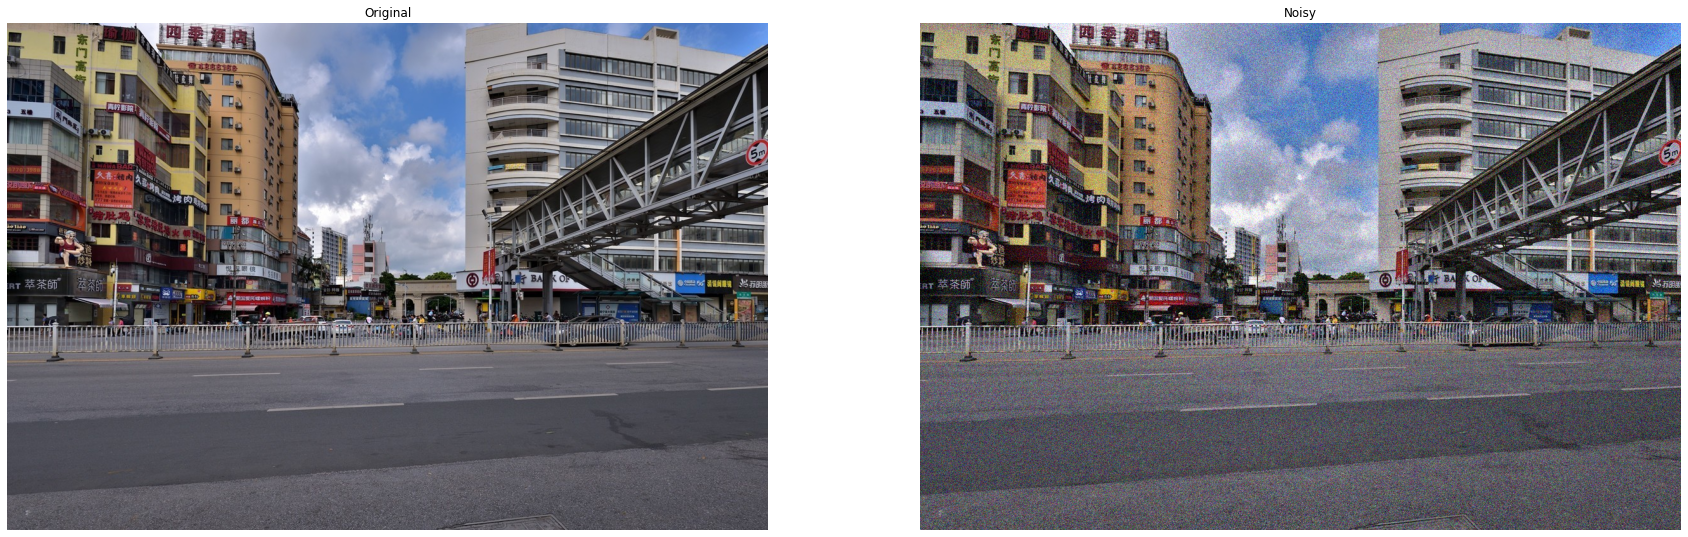

In [43]:
# 将 BGR 图像转换为 RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
noisy_img_rgb = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)

# 显示原始图像
plt.figure(figsize=(30, 15))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original')
plt.axis('off')  # 隐藏坐标轴

# 显示含噪声图像
plt.subplot(1, 2, 2)
plt.imshow(noisy_img_rgb)
plt.title('Noisy')
plt.axis('off')  # 隐藏坐标轴

plt.show()

加雨雾

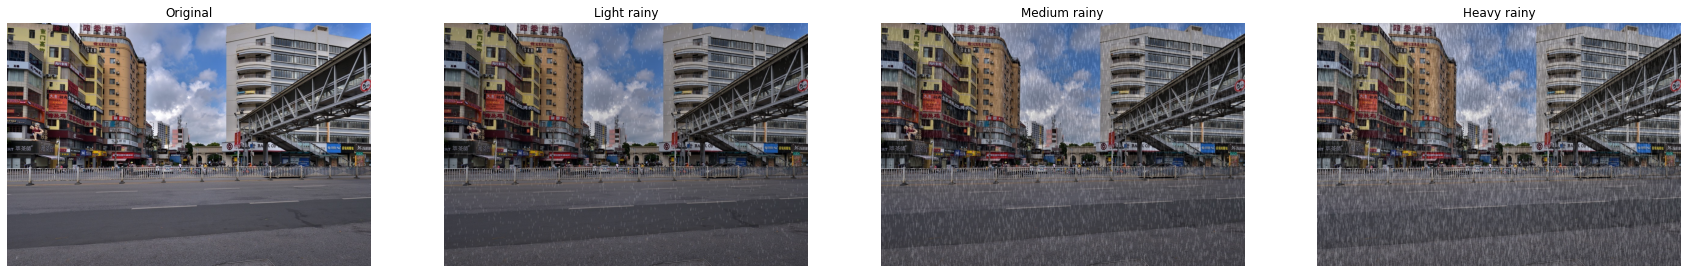

In [44]:
import cv2
import numpy as np
import os

def add_rain(image, rain_intensity):
    # 创建空白图像，生成雨滴
    rain = np.zeros_like(image,dtype=np.uint8)
    
    #设置雨滴强度
    rain_density={
        'light':0.003,
        'medium':0.01,
        'heavy':0.02,
    }
    num_drops = int(rain_density[rain_intensity]* image.shape[0] * image.shape[1])
    
    #随机生成雨滴的长度和位置
    for i in range(num_drops):
        length = 0
        x = np.random.randint(image.shape[1])
        y = np.random.randint(image.shape[0])
        
        if rain_intensity == 'light':
            length = np.random.randint(5,10)
        elif rain_intensity == 'medium':
            length = np.random.randint(10,15)
        elif rain_intensity == 'heavy':
            length = np.random.randint(10,20)
            
        # 绘制雨滴
        cv2.line(rain,(x,y),(x,y+length),(255,255,255),1)
        
    #模糊雨滴
    rain = cv2.blur(rain,(3,3))
    
    #叠加原图
    rain_image = cv2.addWeighted(image,0.8,rain,0.2,0)
    
    return rain_image

# 加载图像
image = cv2.imread('./input/demo.jpg')

# 添加小雨效果
rainy_image_light = add_rain(image, 'light')
# 添加中雨效果
rainy_image_medium = add_rain(image, 'medium')
# 添加大雨效果
rainy_image_heavy = add_rain(image, 'heavy')

save_dir = './output/2_2/rain_image'
if not os.path.exists(save_dir):
    os.makedirs(save_dir, exist_ok=True)

cv2.imwrite('./output/2_2/rain_image/rainy_image_light.jpg', rainy_image_light)
cv2.imwrite('./output/2_2/rain_image/rainy_image_medium.jpg', rainy_image_medium)
cv2.imwrite('./output/2_2/rain_image/rainy_image_heavy.jpg', rainy_image_heavy)

# 显示结果
# cv2.imshow('Light Rain', rainy_image_light)
# cv2.imshow('Medium Rain', rainy_image_medium)
# cv2.imshow('Heavy Rain', rainy_image_heavy)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rainy_image_light = cv2.cvtColor(rainy_image_light, cv2.COLOR_BGR2RGB)
rainy_image_medium = cv2.cvtColor(rainy_image_medium, cv2.COLOR_BGR2RGB)
rainy_image_heavy = cv2.cvtColor(rainy_image_heavy, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30, 15))
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(rainy_image_light)
plt.title('Light rainy')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(rainy_image_medium)
plt.title('Medium rainy')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(rainy_image_heavy)
plt.title('Heavy rainy')
plt.axis('off')

plt.show()

加雾

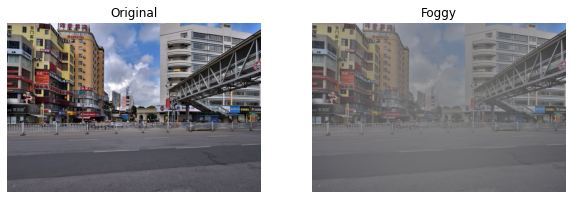

In [45]:
import cv2
import math
from matplotlib import pyplot as plt
import os

img_path = './input/demo.jpg'
 
img = cv2.imread(img_path)
img_f = img / 255.0
(row, col, chs) = img.shape

A = 0.5                               # 亮度
beta = 0.05                           # 雾的浓度
size = math.sqrt(max(row, col))      # 雾化尺寸
center = (row // 2, col // 2)        # 雾化中心
for j in range(row):
    for l in range(col):
        d = -0.04 * math.sqrt((j-center[0])**2 + (l-center[1])**2) + size
        td = math.exp(-beta * d)
        img_f[j][l][:] = img_f[j][l][:] * td + A * (1 - td)

img_f = (img_f * 255).astype('uint8')

save_dir = './output/2_2'
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, 'foggy_img.jpg')

cv2.imwrite(save_path, img_f)
# cv2.imshow("src", img)
# cv2.imshow("dst", img_f)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_f = cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_f)
plt.title('Foggy')
plt.axis('off')

plt.show()

去雾

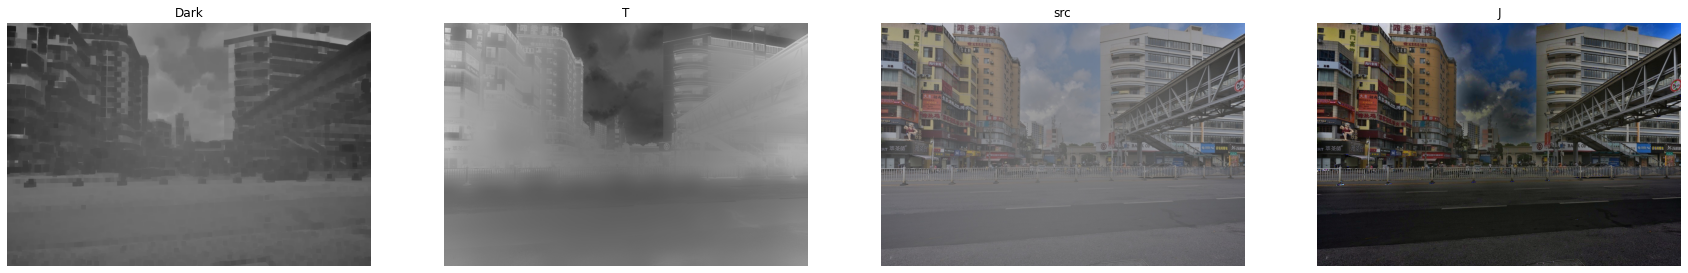

In [46]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

def DarkChannel(im,sz):
    b,g,r = cv2.split(im)#获取各通道数组
    dc = cv2.min(cv2.min(r,g),b);#获取三通道中最暗的
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(sz,sz))#创建腐蚀矩形核
    dark = cv2.erode(dc,kernel)#减少亮区域
    return dark

def AtmLight(im,dark):#估计图像的全局大气光照
    [h,w] = im.shape[:2]
    imsz = h*w
    numpx = int(max(math.floor(imsz/1000),1))#计算用于估计大气光照的像素数量
    darkvec = dark.reshape(imsz);
    imvec = im.reshape(imsz,3);#打平图像

    indices = darkvec.argsort();#获得排序索引
    indices = indices[imsz-numpx::]#倒数第 imsz-numpx 个元素开始直到数组末尾的元素。

    atmsum = np.zeros([1,3])
    for ind in range(1,numpx):
       atmsum = atmsum + imvec[indices[ind]]

    A = atmsum / numpx;
    return A

def TransmissionEstimate(im,A,sz):#估计图像的传输率
    omega = 0.95;
    im3 = np.empty(im.shape,im.dtype);

    for ind in range(0,3):
        im3[:,:,ind] = im[:,:,ind]/A[0,ind]#标准化每个通道

    transmission = 1 - omega*DarkChannel(im3,sz);#计算传输率
    return transmission

def Guidedfilter(im,p,r,eps):#滤波函数
    mean_I = cv2.boxFilter(im,cv2.CV_64F,(r,r));
    mean_p = cv2.boxFilter(p, cv2.CV_64F,(r,r));
    mean_Ip = cv2.boxFilter(im*p,cv2.CV_64F,(r,r));
    cov_Ip = mean_Ip - mean_I*mean_p;

    mean_II = cv2.boxFilter(im*im,cv2.CV_64F,(r,r));
    var_I   = mean_II - mean_I*mean_I;

    a = cov_Ip/(var_I + eps);
    b = mean_p - a*mean_I;

    mean_a = cv2.boxFilter(a,cv2.CV_64F,(r,r));
    mean_b = cv2.boxFilter(b,cv2.CV_64F,(r,r));

    q = mean_a*im + mean_b;
    return q;

def TransmissionRefine(im,et):#细化传输率
    gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY);
    gray = np.float64(gray)/255;
    r = 60;
    eps = 0.0001;
    t = Guidedfilter(gray,et,r,eps);

    return t;

def Recover(im,t,A,tx = 0.1):#复原函数
    res = np.empty(im.shape,im.dtype);
    t = cv2.max(t,tx);

    for ind in range(0,3):
        res[:,:,ind] = (im[:,:,ind]-A[0,ind])/t + A[0,ind]

    return res

if __name__ == '__main__':
    import sys
    
    fn = './output/2_2/foggy_img.jpg'

    def nothing(*argv):
        pass

    src = cv2.imread(fn);

    I = src.astype('float64')/255;
 
    dark = DarkChannel(I,15);
    A = AtmLight(I,dark);
    te = TransmissionEstimate(I,A,15);
    t = TransmissionRefine(src,te);
    J = Recover(I,t,A,0.1);

    # cv2.imshow("dark",dark);
    # cv2.imshow("t",t);
    # cv2.imshow('I',src);
    # cv2.imshow('J',J);
    # cv2.imwrite("./image/J.png",J*255);
    # cv2.waitKey(0);
    # cv2.destroyAllWindows()
    # 
    # dark = np.array(dark,dtype = np.uint8)
    # t = np.array(t,dtype = np.uint8)
    # src = np.array(src,dtype = np.uint8)
    # J = np.array(J,dtype = np.uint8)
    
    dark = (dark * 255).astype('uint8')
    t = (t*255).astype('uint8')
    J = (J * 255).astype('uint8')
    dark = cv2.cvtColor(dark,cv2.COLOR_BGR2RGB)
    t = cv2.cvtColor(t,cv2.COLOR_BGR2RGB)
    src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
    J = cv2.cvtColor(J,cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(30, 15))
    
    plt.subplot(1, 4, 1)
    plt.imshow(dark)
    plt.title('Dark')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(t)
    plt.title('T')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(src)
    plt.title('src')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(J)
    plt.title('J')
    plt.axis('off')
      
    plt.show();

-1